In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
car_data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [5]:
car_data.shape

(4340, 8)

In [6]:
car_data.describe

<bound method NDFrame.describe of                                      name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission    

In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [8]:
car_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [27]:
car_data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [30]:
car_data["name"] = car_data.name.apply(lambda x : ' '.join(x.split(' ')[:1]))
car_data['name']

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: name, Length: 3577, dtype: object

In [31]:
car_data.name.value_counts()

name
Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Jeep                3
Ambassador          3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64

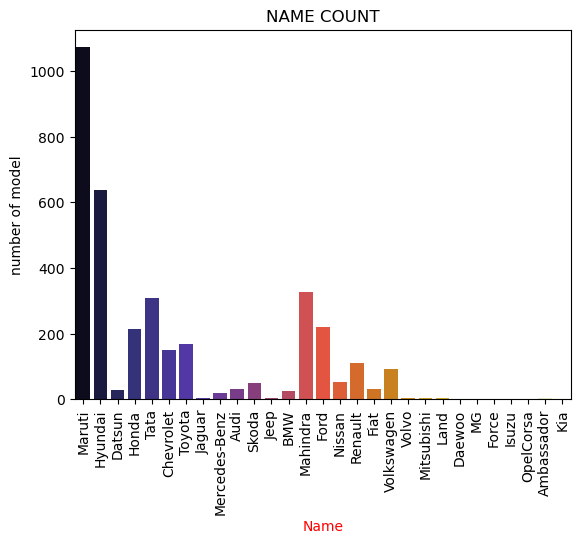

In [37]:
sns.countplot(data=car_data,x="name",palette="CMRmap")
plt.xticks(rotation=90)
plt.xlabel("Name",fontsize=10,color="Red")
plt.ylabel("number of model",fontsize=10,color="black")
plt.title("NAME COUNT",color="black")
plt.show()

In [9]:
car_data.duplicated().any()

True

In [10]:
car_data.drop_duplicates(inplace = True)
car_data.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [11]:
car_data.shape

(3577, 8)

In [12]:
car = car_data.duplicated().any()

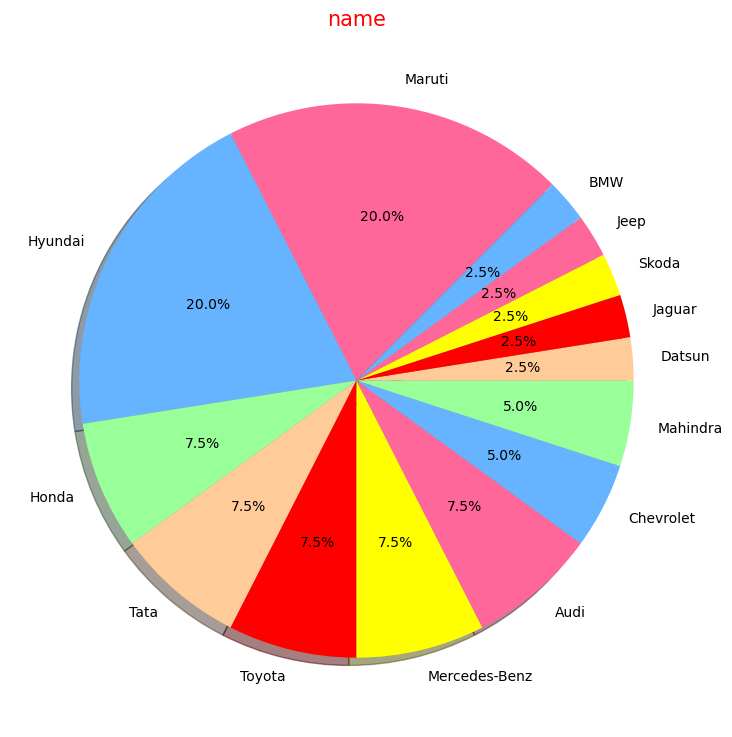

In [44]:
labels = car_data["name"][:40].value_counts().index
sizes = car_data["name"][:40].value_counts()
colors = ['#ff6699','#66b3ff','#99ff99','#ffcc99',"red","yellow"]
plt.figure(figsize = (9,9))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.title('name',color = 'red',fontsize = 15)
plt.show()

In [13]:
print(car_data.fuel.value_counts())
print(car_data.seller_type.value_counts())
print(car_data.transmission.value_counts())

fuel
Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: count, dtype: int64
seller_type
Individual          2832
Dealer               712
Trustmark Dealer      33
Name: count, dtype: int64
transmission
Manual       3265
Automatic     312
Name: count, dtype: int64


In [14]:
car_data.selling_price.value_counts()

selling_price
300000     137
250000     112
350000     106
500000      87
600000      84
          ... 
2595000      1
368000       1
248000       1
641000       1
865000       1
Name: count, Length: 445, dtype: int64

In [47]:
pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 495.5 kB/s eta 0:00:01
   ------------------------------------ --- 276.5/300.2 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.9 MB/s eta 0:00:00


In [48]:
from wordcloud import WordCloud, STOPWORDS

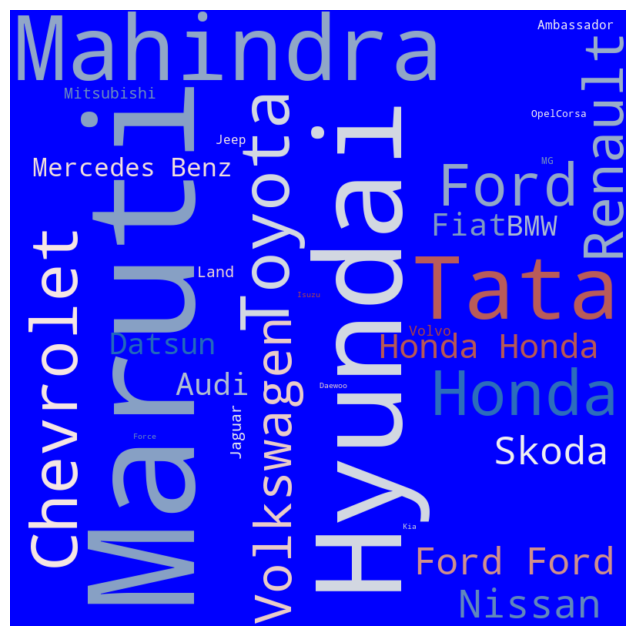

In [51]:
text = ' '.join(car_data['name'])

plt.rcParams['figure.figsize'] = (10,8)
wordcloud = WordCloud(background_color = 'Blue',colormap='vlag', width = 800,  height = 800, max_words = 100).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.show()

In [54]:
car_data.year.value_counts()

year
2017    346
2012    338
2015    332
2014    321
2013    298
2018    295
2016    283
2011    247
2010    210
2009    169
2019    162
2008    129
2007    117
2006     93
2005     61
2020     45
2004     38
2003     22
2002     18
2001     16
2000     12
1998      9
1999      9
1997      3
1996      2
1995      1
1992      1
Name: count, dtype: int64

In [55]:
import seaborn as sns

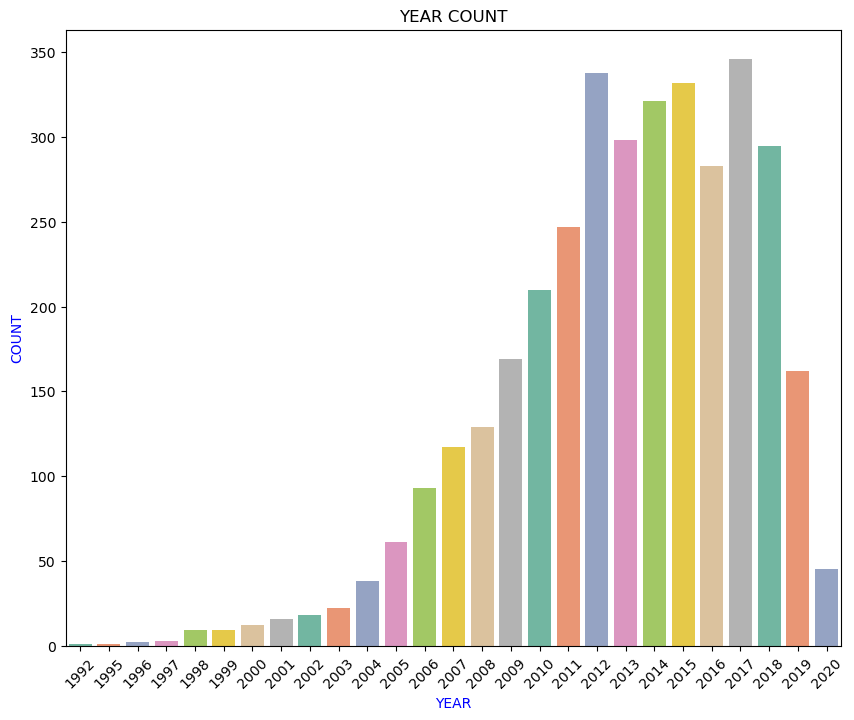

In [60]:
sns.countplot(data=car_data,x="year",palette="Set2")
plt.xticks(rotation=45)
plt.xlabel("YEAR",fontsize=10,color="Blue")
plt.ylabel("COUNT",fontsize=10,color="Blue")
plt.title("YEAR COUNT",color="Black")
plt.show()

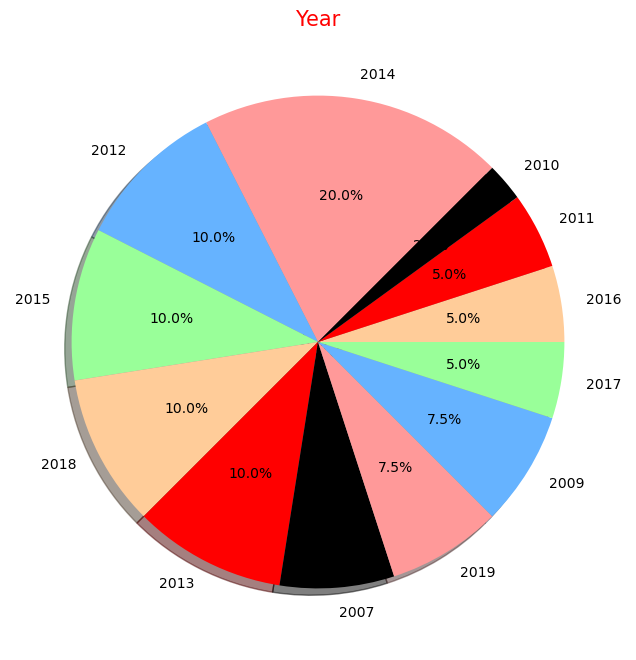

In [61]:
labels = car_data["year"][:40].value_counts().index
sizes = car_data["year"][:40].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"red","black"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.title('Year',color = 'red',fontsize = 15)
plt.show()

In [62]:
car_data.fuel.value_counts()

fuel
1    1800
0    1717
2      37
3      22
4       1
Name: count, dtype: int64

In [16]:
car_data.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3, 'Electric':4}}, inplace=True)
car_data.replace({'seller_type':{'Dealer':0,'Individual':1, 'Trustmark Dealer' : 2}}, inplace=True)
car_data.replace({'transmission':{'Manual':0,'Automatic':1}}, inplace=True)

In [63]:
car_data.seller_type.value_counts()

seller_type
1    2832
0     712
2      33
Name: count, dtype: int64

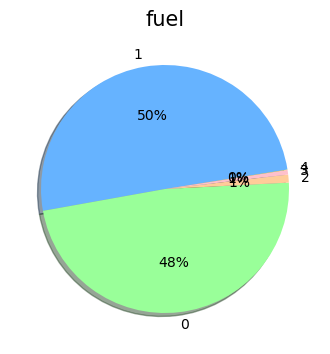

In [71]:
labels = car_data["fuel"].value_counts().index
sizes = car_data["fuel"].value_counts()
colors = ['#66b3ff', '#99ff99', '#ffcc99', "pink", "yellow"]
plt.figure(figsize = (4,9))
plt.pie(sizes, labels = labels, rotatelabels = False, autopct='%1.f%%', colors = colors, shadow = True, startangle = 9)
plt.title('fuel', color = 'Black', fontsize = 15)
plt.show()

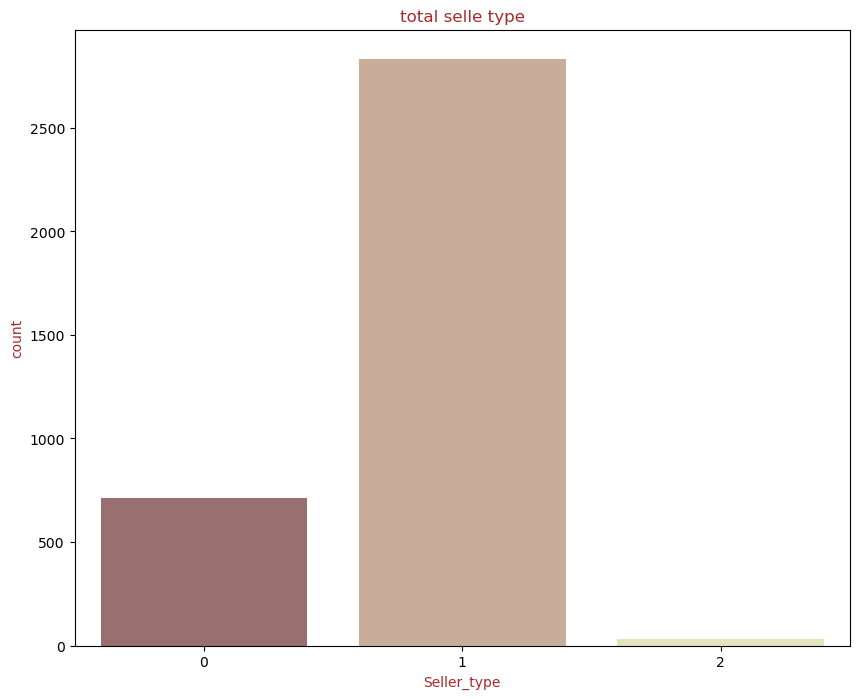

In [75]:
sns.countplot(data = car_data, x = "seller_type", palette = "pink")
plt.xlabel("Seller_type", color = "brown")
plt.ylabel("count", color = "brown")
plt.title("total selle type", color = "brown")
plt.show()

In [76]:
car_data.transmission.value_counts()

transmission
0    3265
1     312
Name: count, dtype: int64

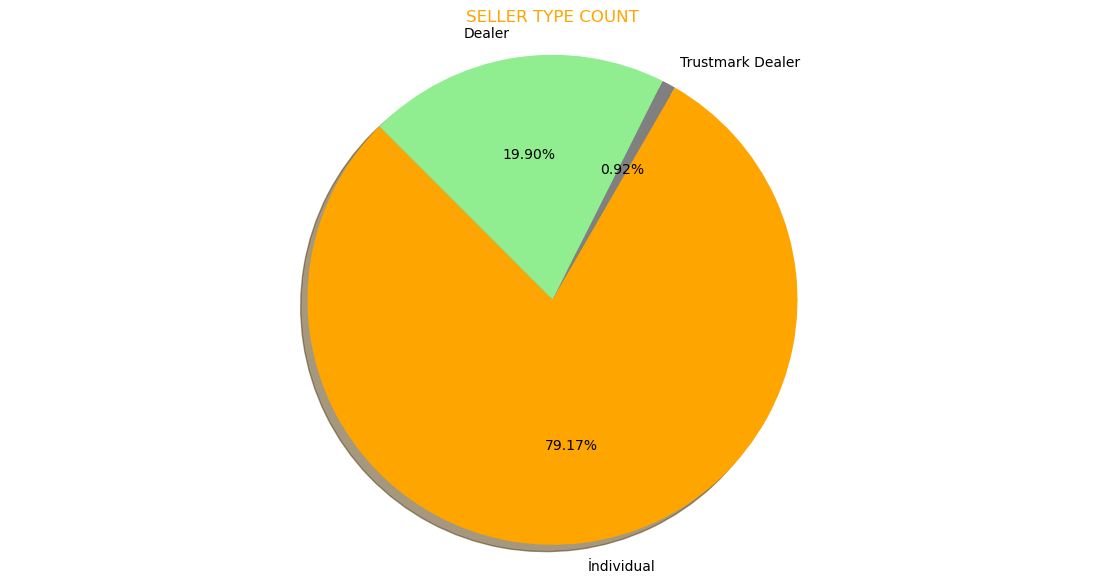

In [77]:
plt.figure(figsize=(14, 7))
labels=["Trustmark Dealer","Dealer","İndividual"]
plt.pie(car_data['seller_type'].value_counts().sort_values(),labels=labels,explode=[0,0,0],
        autopct='%1.2f%%',colors=['gray','lightgreen',"orange"], startangle=60,shadow=True)
plt.title("SELLER TYPE COUNT",color="orange")
plt.axis('equal')
plt.show()

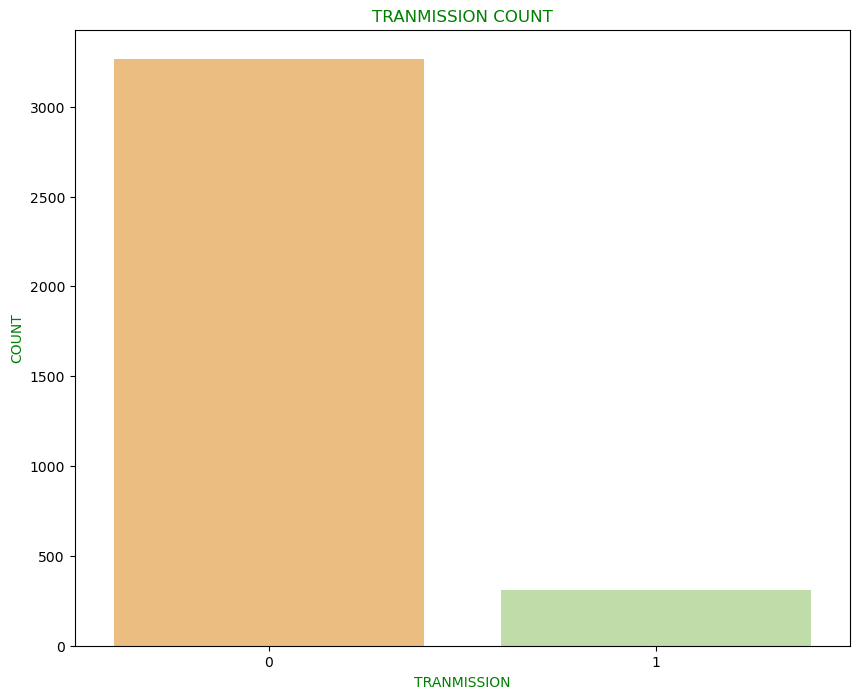

In [82]:
sns.countplot(data=car_data,x="transmission",palette="Spectral")
plt.xlabel("TRANMISSION",fontsize=10,color="GREEN")
plt.ylabel("COUNT",fontsize=10,color="GREEN")
plt.title("TRANMISSION COUNT",color="GREEN")
plt.show()

In [84]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,name_2
0,Maruti,2007,60000,70000,0,1,0,First Owner,Maruti
1,Maruti,2007,135000,50000,0,1,0,First Owner,Maruti
2,Hyundai,2012,600000,100000,1,1,0,First Owner,Hyundai
3,Datsun,2017,250000,46000,0,1,0,First Owner,Datsun
4,Honda,2014,450000,141000,1,1,0,Second Owner,Honda


In [83]:
car_data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,name_2
4335,Hyundai,2014,409999,80000,1,1,0,Second Owner,Hyundai
4336,Hyundai,2014,409999,80000,1,1,0,Second Owner,Hyundai
4337,Maruti,2009,110000,83000,0,1,0,Second Owner,Maruti
4338,Hyundai,2016,865000,90000,1,1,0,First Owner,Hyundai
4339,Renault,2016,225000,40000,0,1,0,First Owner,Renault


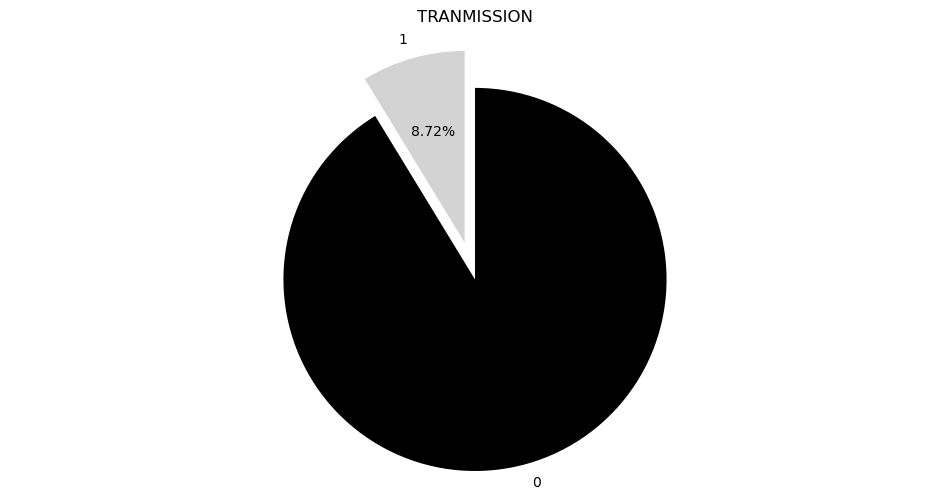

In [88]:
plt.figure(figsize=(12, 6))
labels=['1', '0']
plt.pie(car_data['transmission'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['lightgray','black'], startangle=90)
plt.title('TRANMISSION')
plt.axis('equal')
plt.show()

In [89]:
car_data.owner.value_counts()

owner
First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: count, dtype: int64

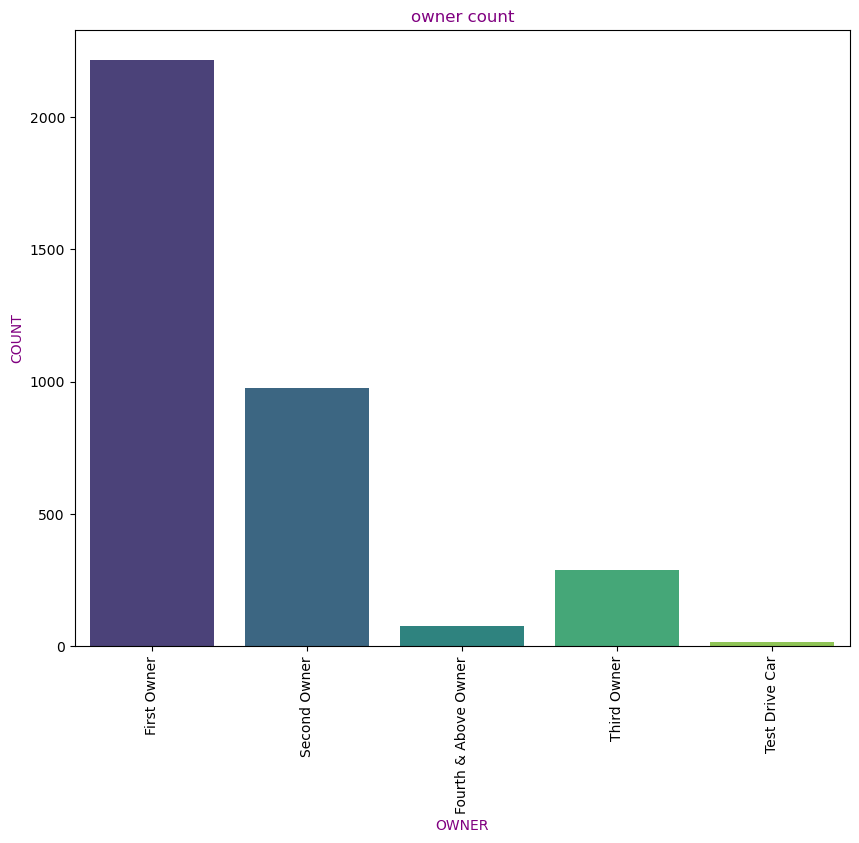

In [97]:
sns.countplot(data=car_data, x="owner",palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("OWNER", fontsize=10,color="purple")
plt.ylabel("COUNT", fontsize=10,color="purple")
plt.title("owner count", color = "purple")
plt.show()

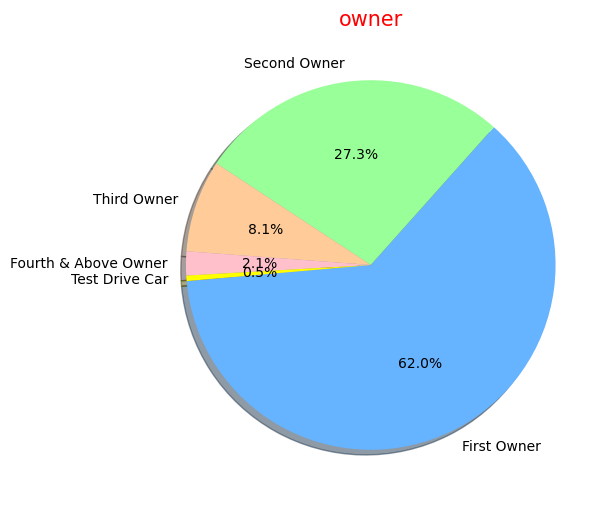

In [100]:
labels = car_data["owner"].value_counts().index
sizes = car_data["owner"].value_counts()
color =  ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (6,6))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct = '%1.1f%%', colors=colors, shadow = True, startangle=905)
plt.title('owner', color = 'red', fontsize = 15)
plt.show()

C:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


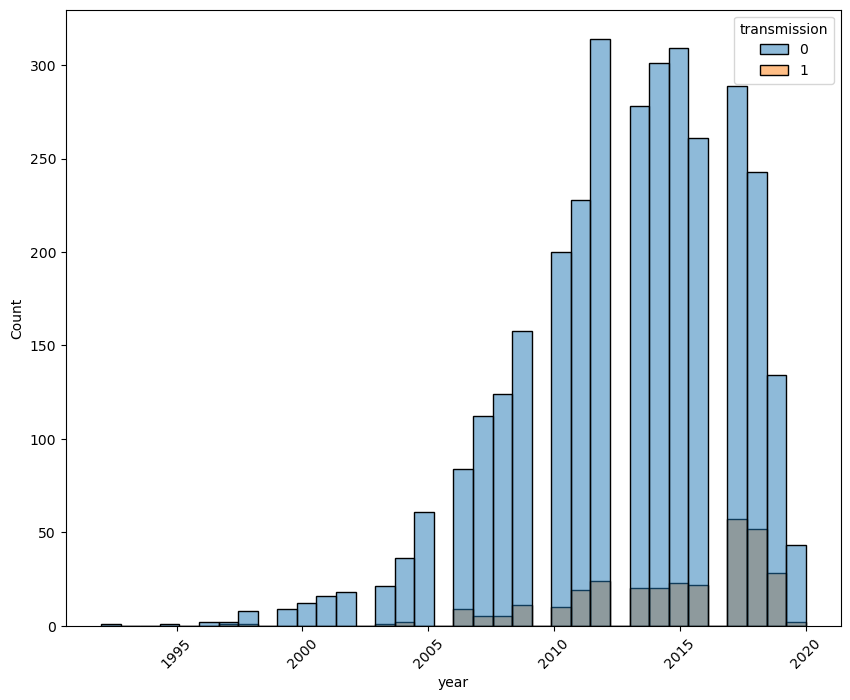

In [101]:
sns.histplot(data = car_data, x = "year", hue = "transmission")
plt.xticks(rotation = 45)
plt.show()

In [111]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,name_2
0,Maruti,2007,60000,70000,0,1,0,First Owner,Maruti
1,Maruti,2007,135000,50000,0,1,0,First Owner,Maruti
2,Hyundai,2012,600000,100000,1,1,0,First Owner,Hyundai
3,Datsun,2017,250000,46000,0,1,0,First Owner,Datsun
4,Honda,2014,450000,141000,1,1,0,Second Owner,Honda


In [109]:
import plotly.express as px

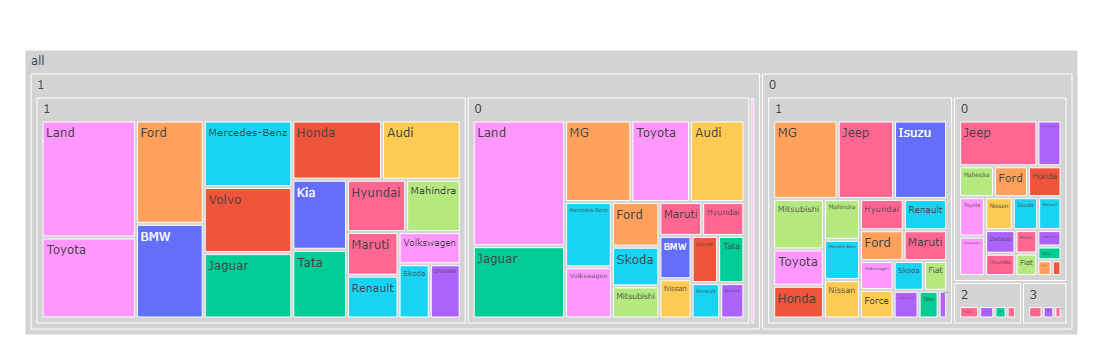

In [114]:
car_data1 = car_data.groupby(["transmission","fuel","name_2"],as_index=False)[['selling_price']].median().rename(columns={'selling_price':'price'})
fig = px.treemap(car_data1, path = [px.Constant("all"), "transmission","fuel","name_2"], 
                 values   ='price', color='name_2',
                 color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.update_layout(margin  = dict(t=50, l=25, r=25, b=25))
fig.show()

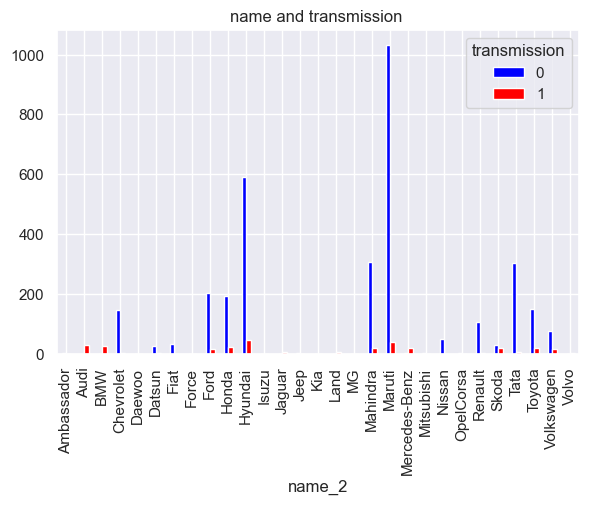

In [123]:
pd.crosstab(car_data["name_2"], car_data["transmission"]).plot(kind="bar", figsize=(6,4), color=["blue","red"], title="name and transmission ")
plt.show()

<Axes: >

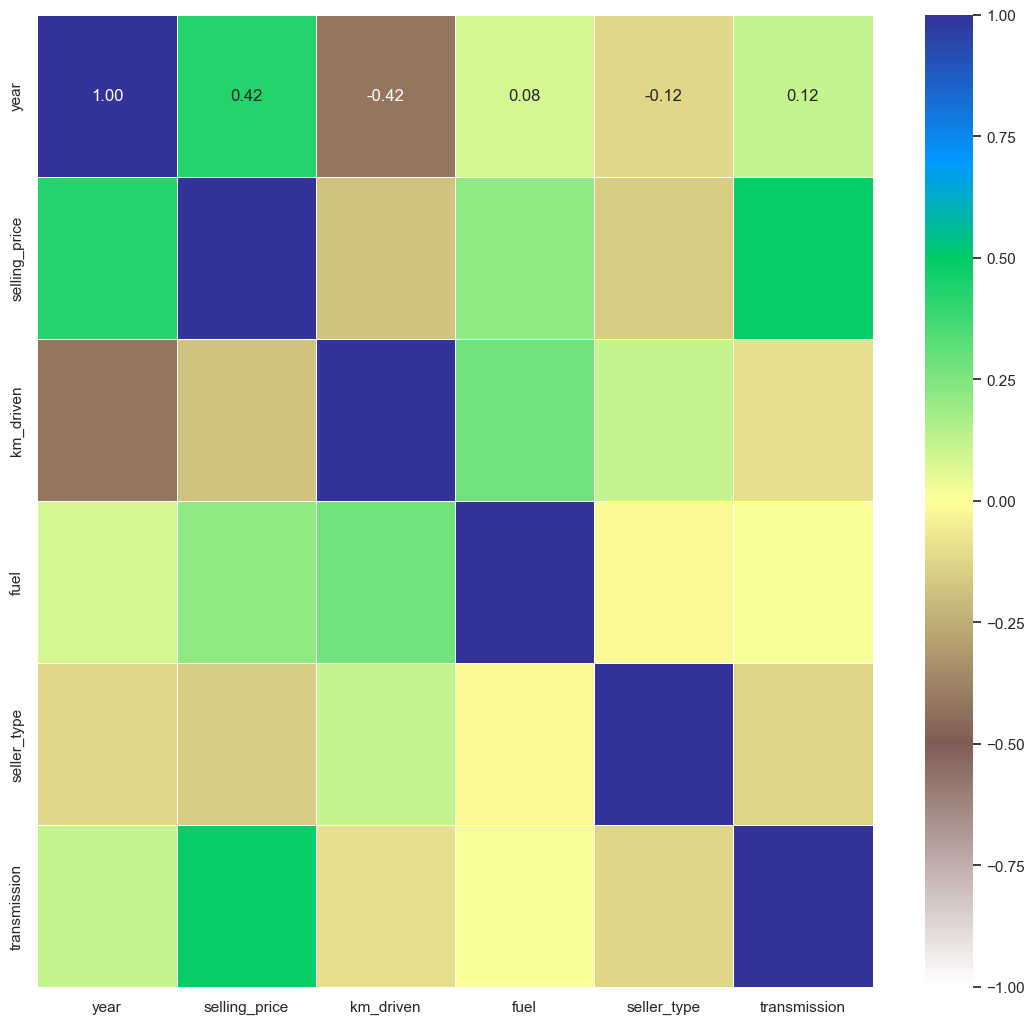

In [127]:
fig, ax = plt.subplots(figsize=(12, 12))
corr1 = car_data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr1, ax=ax, annot=True, cmap='terrain_r', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

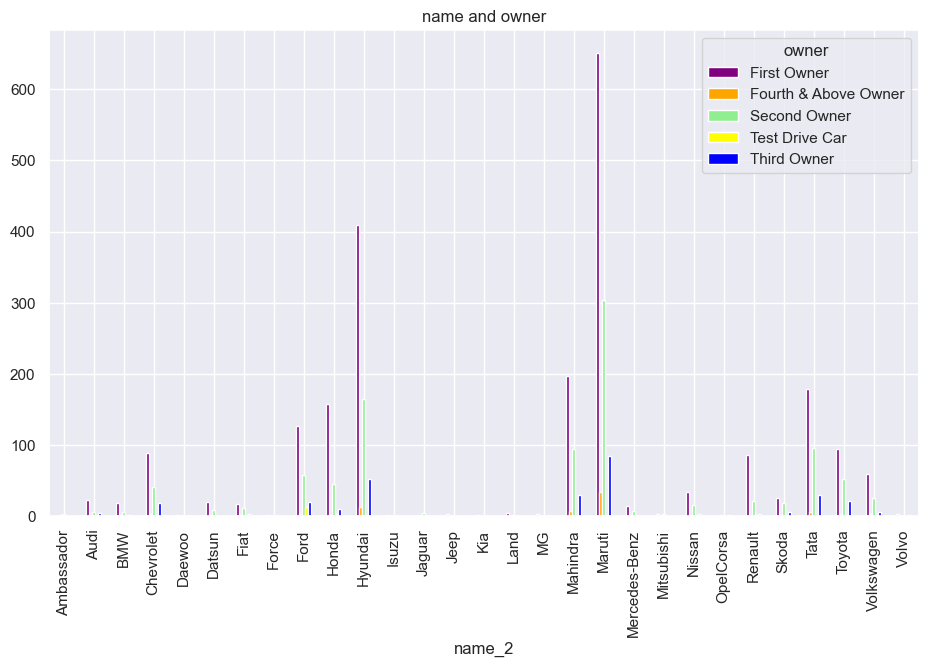

In [130]:
pd.crosstab(car_data["name_2"], car_data["owner"]).plot(kind="bar", figsize=(10,6), color=["purple", "orange", "lightgreen", "yellow","blue"], title="name and owner")
plt.show()            

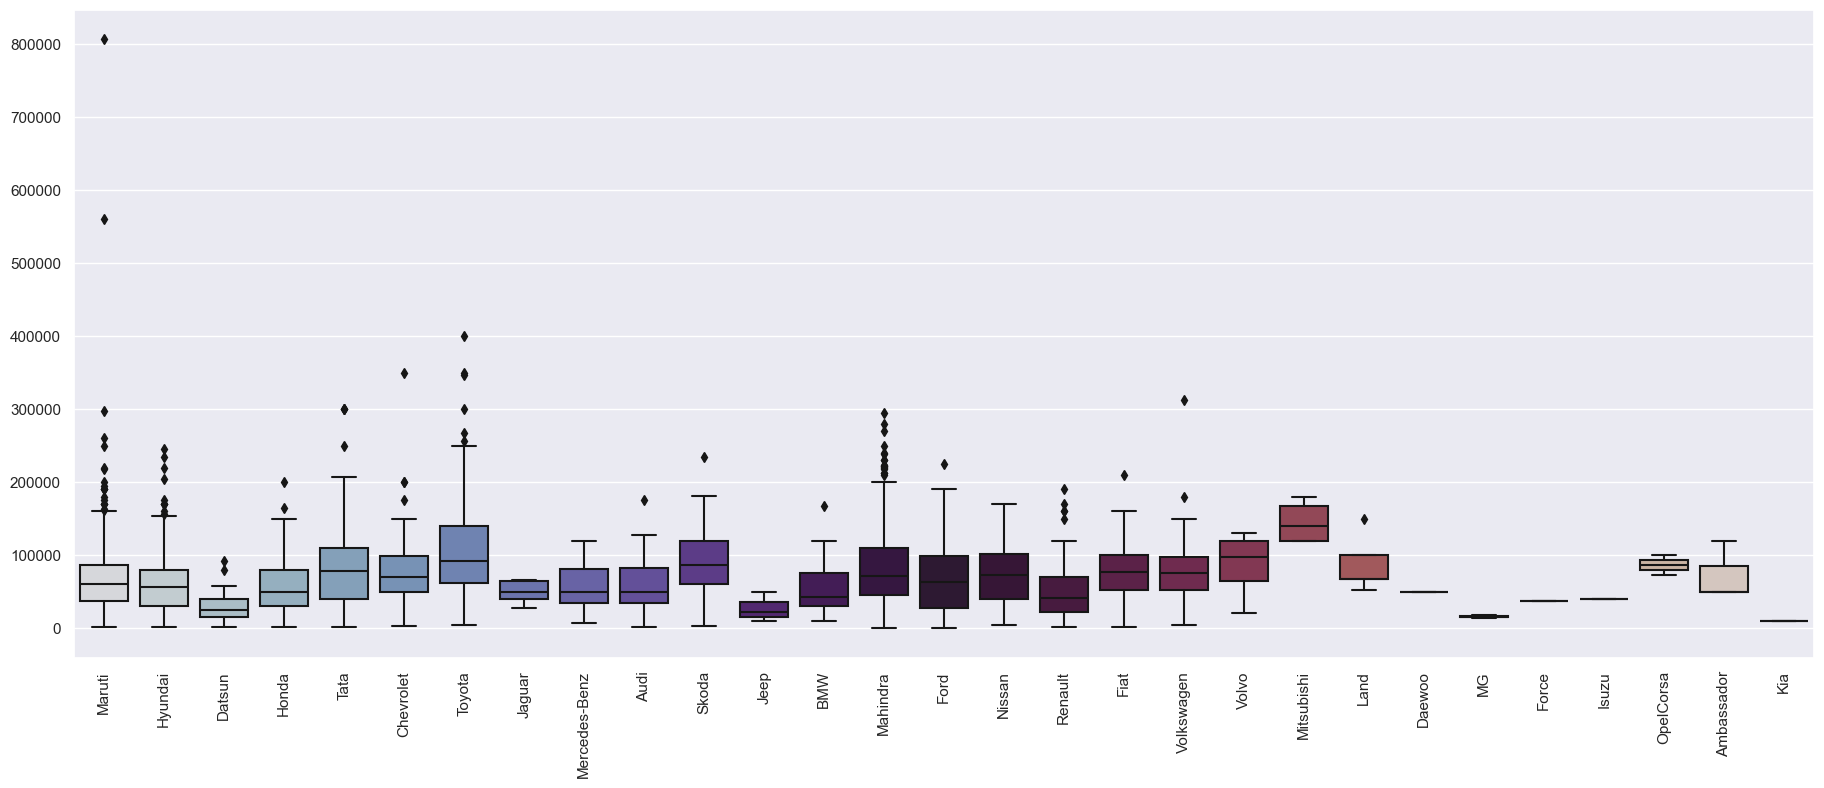

In [131]:
f, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=car_data["name_2"].values, y = car_data["km_driven"].values,palette="twilight",ax=ax)
plt.xticks(rotation=90)
plt.show()

In [106]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,name_2
0,Maruti,2007,60000,70000,0,1,0,First Owner,Maruti
1,Maruti,2007,135000,50000,0,1,0,First Owner,Maruti
2,Hyundai,2012,600000,100000,1,1,0,First Owner,Hyundai
3,Datsun,2017,250000,46000,0,1,0,First Owner,Datsun
4,Honda,2014,450000,141000,1,1,0,Second Owner,Honda


In [21]:
import re

In [25]:
# Sample data
data = {
    "name": [
        "Maruti 800 AC",
        "Maruti Wagon R LXI Minor",
        "Hyundai Verna 1.6 SX",
        "Datsun RediGO T Option",
        "Honda Amaze VX i-DTEC",
        "Hyundai i20 Magna 1.4 CRDi (Diesel)",
        "Maruti 800 AC BSIII",
        "Hyundai Creta 1.6 CRDi SX Option",
        "Renault KWID RXT"
    ]
}

# Create DataFrame
df = car_data.DataFrame(data)

# Split the 'name' column by whitespace and take the first part
df['Company'] = df['name'].str.split().str[0]

# Display the result
print(df['Company'])


AttributeError: 'DataFrame' object has no attribute 'DataFrame'